# Activation Functions

## 1. Activation Functions의 사용이유
- $L$개의 Hidden Layer를 가지는 Deep Neural Network에서 $l^{th}$ hidden layer를 보자<br> 
$ \ \ $ $\checkmark \ $ $l^{th}$ hidden layer에는  선형변환된  $n_l$개의 node를 가짐

- Deep Neural Network의 $l^{th}$ hidden layer에서 $W^{(l)}$ 행렬을 이용한 선형변환과 Activation Function을 이용한 비선형변환 $\sigma^{(l)}$을 이용함<br>

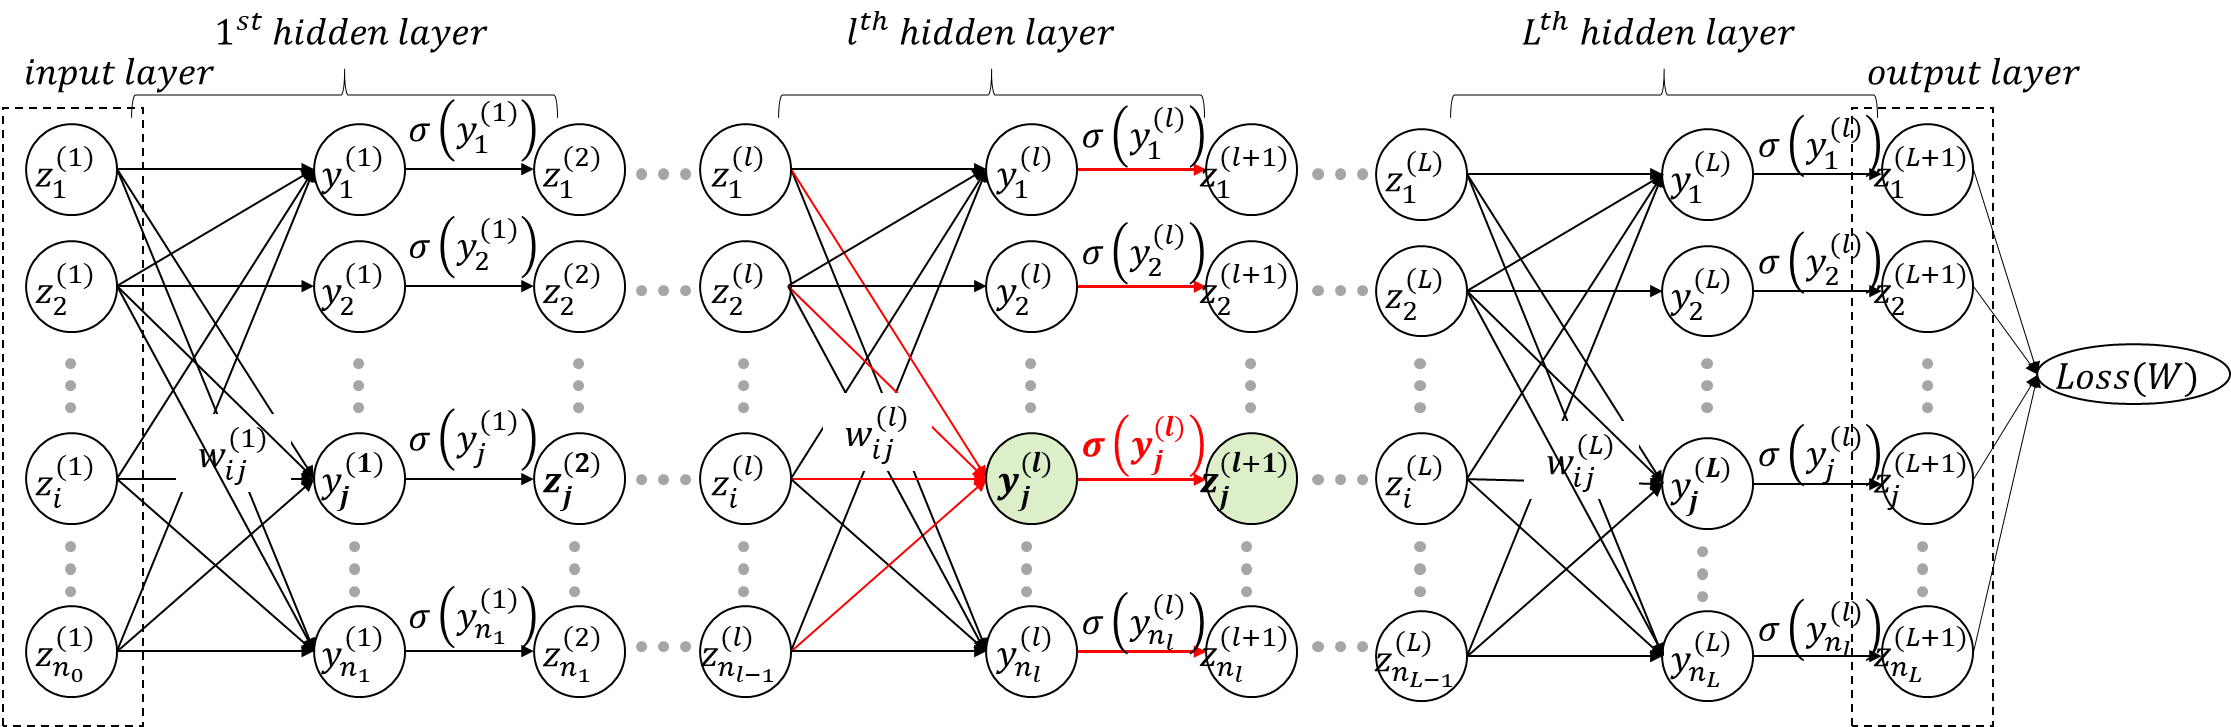

- 선형변환: <br>
$\qquad \qquad \qquad$
$
\begin{align}
\hat y_i^{(l)} &= \hat w_{0i}^{(l)} + \hat w_{1i}^{(l)}z_{1}^{(l)}+ \cdots + \hat w_{n_{l-1}, i}^{(l)}z_{n_{l-1}}^{(l)}  \\
&= \sum_{k=0}^{n_{l-1}}  w_{ki}^{(l)}z_{k}^{(l)}  \\
&= \hat w_{i}^{(l)}z^{(l)}, i=1,2,.., n_l \\\\
\underset{\left(n_l \times 1\right)}{y^{(l)}} &= \underset{\left( n_l \times n_{l-1} \right)}{W^{(l)}} \  \underset{\left( \left( n_{l-1} \right) \times 1 \right)}{z^{(l)}}, \ \ (선형변환을 \ 행렬 \ W^{(l)}로 \ 표현한 \ 식)\\\\
\end{align}
$
    
- 비선형변환: <br>
$ \ \ $ $\checkmark \ $ 선형변환된 결과 $y^{(l)}$에 대해  비선형변환함수 $\sigma^{(l)}$를 componentwise로 적용하여 $z^{(l+1)}$을 만들어냄<br>
<br>
$\qquad \qquad \qquad$
$
\begin{align}
z_i^{(l+1)} &= \sigma \left( \hat y_i^{(l)} \right) \\\\
z^{(l+1)} &= \sigma \left( \hat y^{(l)} \right)
\end{align}
$
<br>
<br>
$ \ \ $ $\checkmark \ $ 비선형변환은 선형변환된 Hyperplane을 휘어지게 함

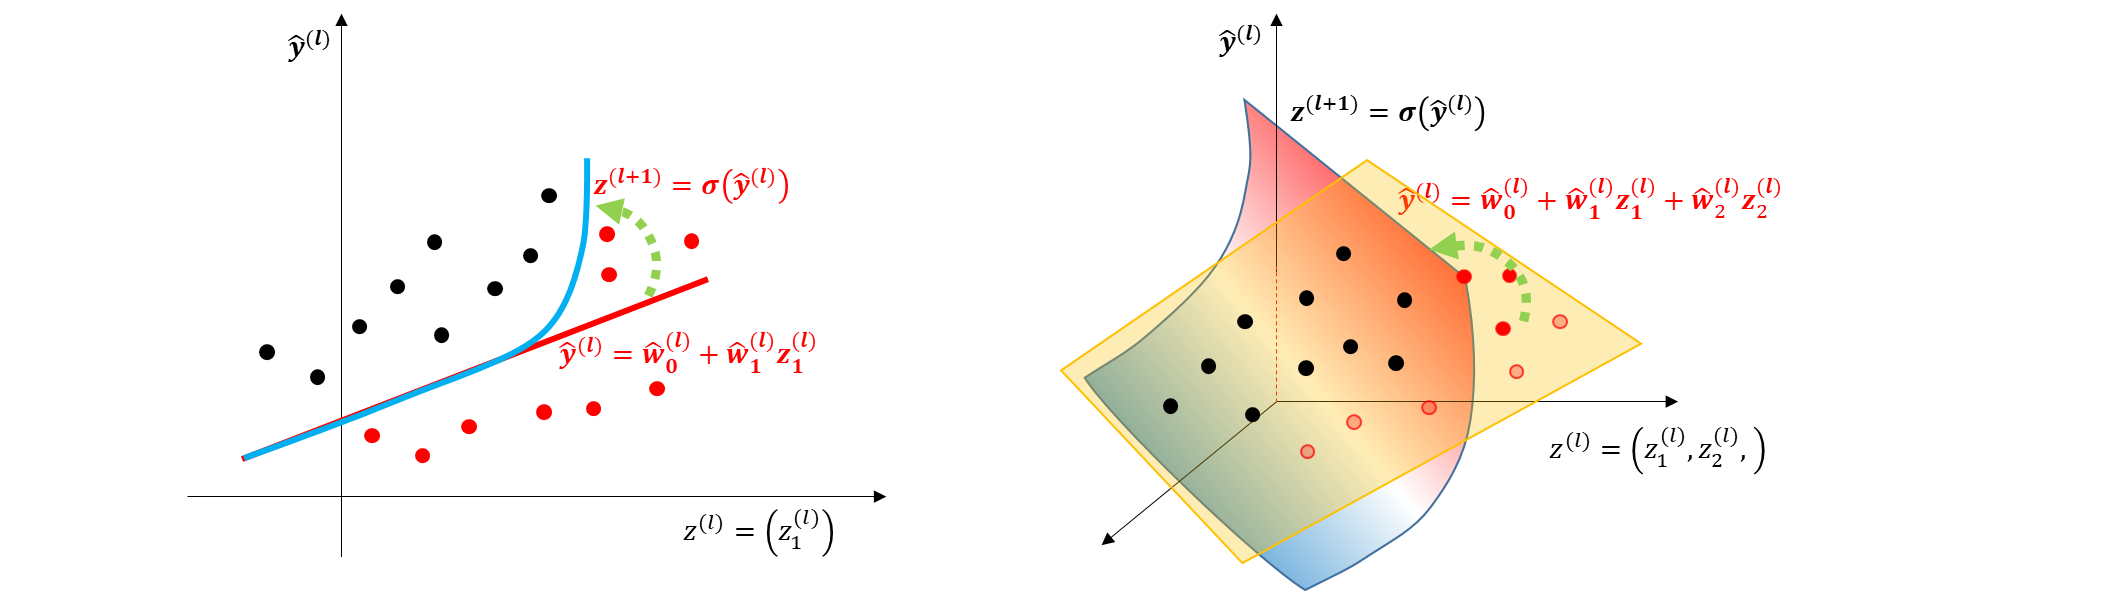

## 2. 자주 사용하는 Activation Functions

- Deep Neural Network에서 사용하는 <span style="color:red">Activation Function은  간단한 비선형변환함수</span>임<br>
$ \ \ $ $\checkmark \ $ Activation Function의 비선형효과가 충분하지 않으면 Hidden layer를 반복하여 원하는 비선형효과를 가지게할 것임<br>
$ \ \ $ $\checkmark \ $ ReLU, Sigmoid, tanh는 함수형태도 간단하지만 <span style="color:red">미분함수도 매우 간단히 계산할 수 있는 함수</span>임
<br>
<br>

Activation Function | 중요도  | arguments | $\qquad$ Activation Function 수식
:----: | :----: | :---- | :---- 
<br> $ReLU$ | <br> $\blacksquare$ | $y$: 입력 텐서  | <br> $$ z_i^{(l+1)} = \begin{cases} y_i^{(l)}, & if \ \  y_i^{(l)}>0  \\\\ 0, & if \ \  y_i^{(l)}<0  \end{cases}$$ 
<br> $Sigmoid$ | <br>  $\blacksquare$ | <br>  $y$: 입력 텐서  | <br> $$ z_i^{(l+1)} = \frac{1}{1+e^{-y_i^{(l)}}}$$ 
<br> $tanh$ <br> (Hyperbolic tangent) | <br>  $\blacksquare$ | $y$: 입력 텐서  | <br> $$ z_i^{(l+1)} = \frac{e^{y_i^{(l)}}-e^{-y_i^{(l)}}}{e^{y_i^{(l)}}+e^{-y_i^{(l)}}}$$ | $$ tanh \left( y_i \right) = 2Sigmoid \left( 2y_i \right) - 1  $$
<br> $Softmax$ | <br>  $\blacksquare$ | $y$: 입력 텐서  | <br> $$ z_i^{(l+1)} = \frac{e^{y_i^{(l)}}}{\sum_{i=1}^{C} e^{y_i^{(l)}}}$$ 
<br> $Elu$ <br> (Exponential linear activation)  |  | <br> $y$: 입력 텐서 <br> $\alpha$: 스칼라, 음수 부분의 기울기 | <br>  $$ z_i^{(l+1)} = \begin{cases} y_i^{(l)}, & if \ y_i^{(l)} >0  \\\\ \alpha \left( e^{y_i^{(l)}} - 1 \right), & if \ y_i^{(l)}<0  \end{cases}$$ 
<br> $Selu$ <br> (Scaled Exponential unit activation) | |<br>  $y$: 입력 텐서  | <br>  $$ z_i^{(l+1)} = scale \times Elu \left( y_i^{(l)}, \alpha \right)$$  $\qquad$ $\alpha$: 스칼라, 음수 부분의 기울기 <br>  $\qquad$ $scale$: 실수  값

#### (1) ReLU() 함수

$$
\hat z_j^{(l+1)}=
\begin{cases}
\hat y_j^{(l)}, &  if \ \ \hat y_j^{(l)} \ge 0 \\\\
0, &  if \ \ \hat y_j^{(l)} < 0 
\end{cases}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def ReLU(y):
     return np.maximum(0, y)

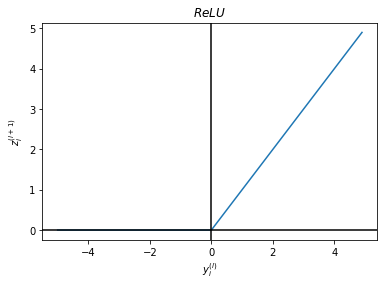

In [2]:
y_set = np.arange(-5.0, 5.0, 0.1)
z = ReLU(y_set)

plt.plot(y_set, z)

plt.axvline(x=0, color = 'k') # draw x =0 axes 
plt.axhline(y=0, color = 'k') # draw y =0 axes

plt.title("$ReLU$")

plt.xlabel('$y_i^{(l)}$')
plt.ylabel('$z_i^{(l+1)}$')

plt.show()

#### (2) Sigmoid() 함수
$$
\hat z_i^{(l+1)} = \frac{1}{1+e^{- \hat y_i^ { \ (l)}}}
$$

In [3]:
def sigmoid(y):
    return 1 / (1 + np.exp(-y))

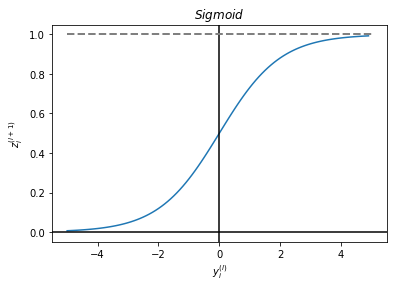

In [4]:
import numpy as np
import matplotlib.pyplot as plt
y = np.arange(-5.0, 5.0, 0.1)
z = sigmoid(y)

plt.plot(y, z)

plt.axvline(x=0, color = 'k') # draw x =0 axes 
plt.axhline(y=0, color = 'k') # draw y =0 axes

plt.title("$Sigmoid$")

plt.xlabel('$y_i^{(l)}$')
plt.ylabel('$z_i^{(l+1)}$')

plt.hlines(1.0, -5, 5, color='gray', linestyle='--', linewidth=2)
plt.show()

#### (3)  tanh()함수

- tanh() 함수의 형태<br>
$ \ \ $ $\checkmark \ $ $sinh(y) = \frac{e^y - e^{-y}}{2}$<br>
$ \ \ $ $\checkmark \ $ $cosh(y) = \frac{e^y + e^{-y}}{2}$<br>
$ \ \ $ $\checkmark \ $ $tanh(y) = \frac{sinh(y)}{cosh(y)} =   \frac{e^{y}-e^{-y}}{e^{y}+e^{-y}}$<br>

In [5]:
def tanh(y):
    return (np.exp(y) - np.exp(-y)) / (np.exp(y) + np.exp(-y))

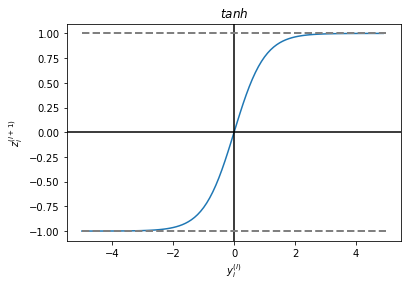

In [6]:
import numpy as np
import matplotlib.pyplot as plt
y = np.arange(-5.0, 5.0, 0.1)
z = tanh(y)

plt.plot(y, z)

plt.axvline(x=0, color = 'k') # draw x =0 axes 
plt.axhline(y=0, color = 'k') # draw y =0 axes

plt.title("$tanh$")

plt.xlabel('$y_i^{(l)}$')
plt.ylabel('$z_i^{(l+1)}$')

plt.hlines(1.0, -5, 5, color='gray', linestyle='--', linewidth=2)
plt.hlines(-1.0, -5, 5, color='gray', linestyle='--', linewidth=2)
plt.show()

#### (4)  Softmax()함수

- Activation function인 Softmax() 함수의 미분<br>

$$
\begin{align}
z_{i}^{(l+1)} &= Softmax \left( \hat y_i^{(l)} \right) \\
              &= \frac{e^{ \hat y_i^{(l)}}}{\sum_{i=1}^{C}e^{\hat  y_i^{(l)}}}, \ \ C=Class의 수
\end{align}
$$

In [7]:
import numpy as np

def softmax(y_set):
    y_set_exp = np.exp(y_set)
    sum = np.sum(y_set_exp)
    z = y_set_exp/sum
    return z

def dsoftmax(y):
    return softmax(y_set) * (1 - softmax(y_set))

y_set = np.array([1, 3.2, 4.4, 1.5])
print(softmax(y_set), np.sum(softmax(y_set)))

[0.02401662 0.21675031 0.71963636 0.03959671] 1.0


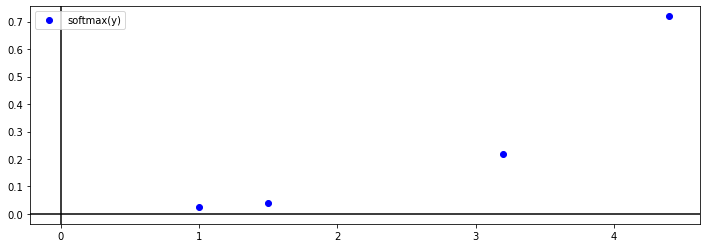

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 1, 1)

ax1.axvline(x=0, color = 'k') # draw x =0 axes 
ax1.axhline(y=0, color = 'k') # draw y =0 axes
ax1.plot(y_set, softmax(y_set), 'ob', label="softmax(y)")
ax1.legend(loc='upper left')

#### [생각해 보기 1 ]

- Deep Neural Network은 선형변환과 비선형변환을 반복적으로 사용한 Approximation방법임


- 선형변환에 사용하는 $W^{(l)}$은 Gradient Descent를 사용하여 최적화 시켜 주는데 반해 비선형 변환은 미지 정해진 비선형함수를 사용하고 있음


- 이러한 방법이 합당할까?


- 비선형변환을 최적화시키기 위해 어떤 방법을 생각할 수 있을까?


- Deep Neural Network으 최적화시킨다는 관점에서 비선형홤수를 최적화 시킬 수 있는 방법은 무엇일까?


- Parameter를 포함한 다음과 같은 Sigmoid Function을 사용한다고 하자<br>
$ \ \ $ $\checkmark \ $  $ a^{(l)} \ := \ $ Scale Parameter<br>
$ \ \ $ $\checkmark \ $  $ b^{(l)} \ := \ $ Location Parameter<br>

$$
\begin{align}
z^{(l+1)} =& \frac{1}{1+ e^{- \ y^{(l)}}} \\\\
z^{(l+1)} =& \frac{a^{(l)}}{1+ e^{- \ \left( y^{(l)} - b^{(l)} \right) }}
\end{align}
$$

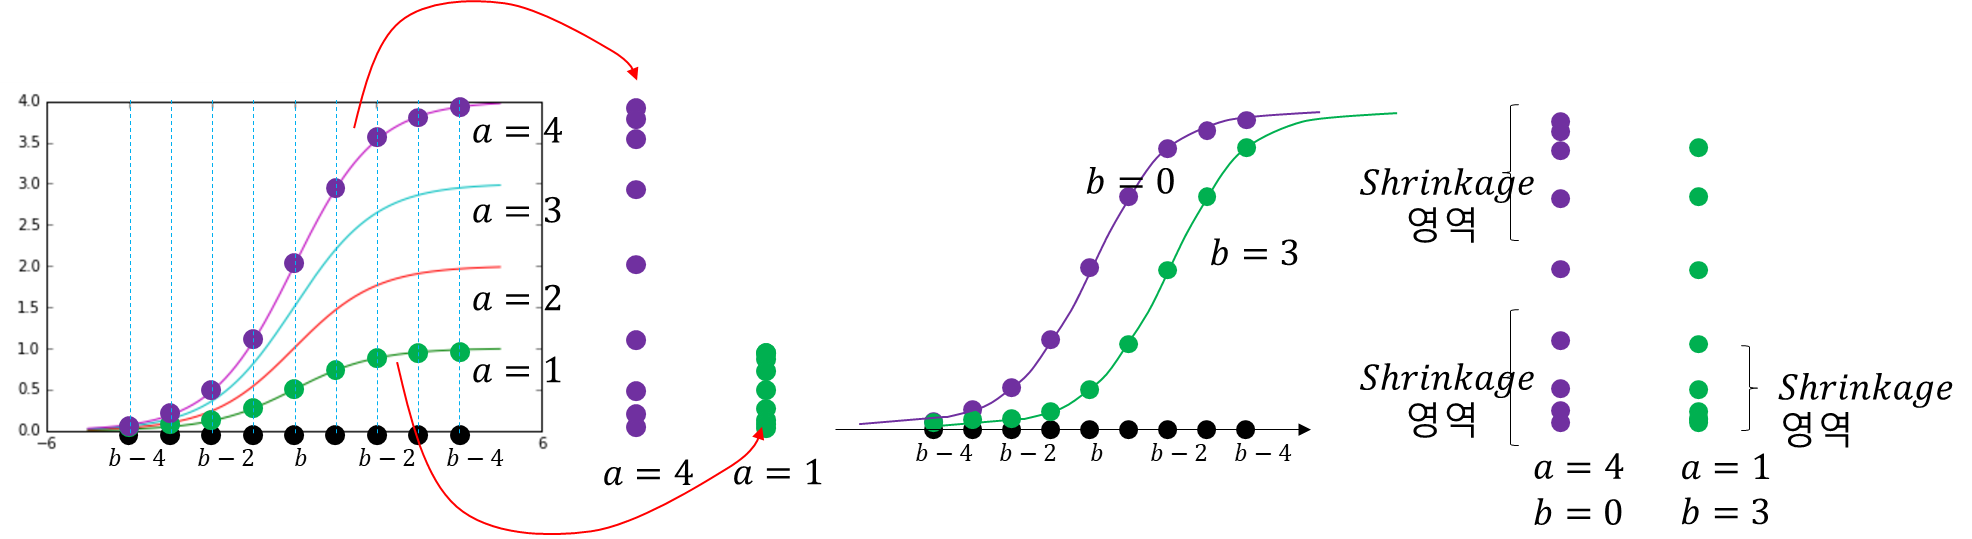

$ \ \ $ $\checkmark \ $ 기존의 Activation Function에 비해 장점은 무엇인가?<br>
$ \ \ $ $\checkmark \ $ 기존의 Activation Function에 비해 단점은 무엇인가?<br>

#### [생각해 보기 2 ]

- Deep Neural Network은 선형변환과 비선형변환을 반복적으로 사용한 Approximation방법임


- 선형변환을 연속적으로 여러 번 사용한 후 비선형 변환을 사용하면 어떨까?<br>
$ \ \ $ $\checkmark \ $ 선형변환을 여러번 사용하는 것이 무의미한 이유를 설명해 보시오<br>


- 선형변환 한번에 비선형변환을 연속적으로 여러 번 사용하는 방법은 어떨까?<br>
$ \ \ $ $\checkmark \ $ 이러한 Deep Neural Network을 만들어서 기존의 Deep Neural Network학습 방법과 성능을 비교해 볼 수 있겠는가?